# Upper Confidence Bound

## Motivation

The [Upper Confidence Bound (UCB) Algorithm](https://banditalgs.com/2016/09/18/the-upper-confidence-bound-algorithm/) is a highly effective policy for finding the optimal arm in classical [Multi-Armed Bandits](https://banditalgs.com/2016/09/18/the-upper-confidence-bound-algorithm/). It was developed by [T. L. Lai and H. Robbins](https://www.sciencedirect.com/science/article/pii/0196885885900028) in 1985.

It is based on the principle of **Optimism in the Face of Uncertainty**. Based on the previous experience, in each round, the algorithm determines for each arm the most optimistic estimate for the expected reward that is still plausible from statistical concentration inequalities. This principle naturally gives rise to an exploration bonus for rarely visited arms. More precisely, in round $t$ this bonus takes the form
$$\sqrt{\frac{2\log(1/\delta)}{T(t - 1)}},$$
where $\delta$ is a hyperparameter and $T(t - 1)$ denotes the number of times the considered arm was played before round $t$.

In [43]:
import numpy as np

def expl_bonus(visits, 
               delta = 1/np.exp(4)):
    """UCB exploration bonus
    
    # Arguments
        visits: number of visits to the considered arms
        delta: hyperparameter encoding degree of optimism
    # Result
        UCB exploration bonus
    """
    
    return np.sqrt(2 * np.log(1 / delta) / visits)

## Simulation

To illustrate how effective UCB is, we look at a 2-armed bandit with normal rewards of means 1 and 1.1, respectively.

In [91]:
mus = [1, 1.1]
N = 1000

seed = 42
np.random.seed(seed)

 We play the bandit for $N= 1000$ episodes.

In [92]:
visits = np.ones(2)
rewards = np.zeros(2)
trace_a = []

for _ in range(N):
    #select action via ucb
    kpi = rewards / visits + expl_bonus(visits)
    a = np.argmax(kpi)

    #retrieve rewards
    r = np.random.normal(mus[a])

    #update history
    visits[a] += 1
    rewards[a] += r

    #remember actions
    trace_a += [a]

A plot of the trace reveals that UCB quickly identifies arm 1 as the optimal arm.

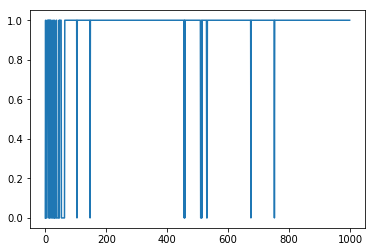

In [112]:
import seaborn as sns

sns.lineplot(np.arange(N), trace_a)